# Predicting Vaccine Response with FluPRINT: Data Acquisition and Preprocessing

# Introduction to Predicting Vaccine Response with FluPRINT
This project aims to predict vaccine response using the FluPRINT dataset. We will explore how factors such as race, delta_geo_mean (differenece between the titres before and after vaccination), and the presence and proportion of immune cells influence vaccine efficacy and if it is at all possible to reliably and accuratelly predict the vaccine reponse based on either one or combination of these factors.

## Objectives
- Load and preprocess the FluPRINT dataset.
- Conduct initial data analysis on key variables.
- Select relevant features for predicting vaccine response.

---

## Step 1 - Import Libraries

In this step, we import all the necessary libraries required for this notebook. Consolidating imports at the beginning ensures:

- **Ease of access**: All libraries are imported in one place, making it easier to track dependencies.
- **Tidiness**: The notebook remains organised and avoids scattered import statements.
- **Avoidance of duplication**: Prevents redundant imports throughout the notebook.

The libraries listed below were added incrementally during the development of this notebook, as needed.

### Libraries Overview:
- **os**: For handling file paths and directory operations.
- **pandas**: For data manipulation and analysis.
- **seaborn**: For creating visually appealing statistical plots.
- **matplotlib.pyplot**: For basic plotting and visualisation.
- **missingno**: For visualising missing data patterns.

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## Step 2 - Data Loading

In this step, we load the FluPRINT dataset from a CSV file. The dataset is stored locally and contains information about flu vaccine responses and various factors that might influence them.

In [ ]:
# Define the path to the FluPRINT database CSV file
database = r"C:\Users\OneDrive\Documents\Applied Data science\FluPRINT_database\fluprint_export.csv"

# Read the CSV file
fluprint_raw = pd.read_csv(database)

# Display the contents of the DataFrame
display(fluprint_raw)

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_2yr_prior,vaccine_type_2yr_prior,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156113,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
156114,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
156115,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
156116,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0


### Key Variables Shown:
- **demographics**: `gender`, `race`, `visit_age`
- **Vaccination history**: Multiple year-specific vaccine type columns
- **Immune markers**: `cmv_status`, `ebv_status`
- **Clinical outcomes**: `influenza_infection_history`, `influenza_hospitalization`
---

## Step 3 - Exploratory Data Analysis (EDA)

This section focuses on initial data exploration and visualisation to understand the structure of the FluPRINT dataset, check for missing values, analyse participant demographics, and explore key features such as race, age, and visit year.

### Column Names

We start by listing all column names in the dataset to get an overview of the available features.

In [5]:
# Display column names in the dataset
column_names = fluprint_raw.columns.tolist()
print(f"Column names: {column_names}")

Column names: ['donor_id', 'study_id', 'gender', 'race', 'visit_id', 'visit_year', 'visit_day', 'visit_type_hai', 'visit_age', 'cmv_status', 'ebv_status', 'bmi', 'vaccine', 'geo_mean', 'd_geo_mean', 'vaccine_response', 'mesurment_id', 'assay', 'name', 'name_formatted', 'subset', 'units', 'data', 'statin_use', 'flu_vaccination_history', 'total_vaccines_received', 'vaccinated_1yr_prior', 'vaccine_type_1yr_prior', 'vaccinated_2yr_prior', 'vaccine_type_2yr_prior', 'vaccinated_3yr_prior', 'vaccine_type_3yr_prior', 'vaccinated_4yr_prior', 'vaccine_type_4yr_prior', 'vaccinated_5yr_prior', 'vaccine_type_5yr_prior', 'influenza_infection_history', 'influenza_hospitalization']


### Key Feature Groups:

1. **Participant Information**: 
   - Demographics: `donor_id`, `gender`, `race`, `visit_age`
   - Health status: `cmv_status`, `ebv_status`, `bmi`

2. **Visit Details**: 
   - `visit_id`, `visit_year`, `visit_day`, `visit_type_hai`

3. **Vaccine Response Metrics**: 
   - `geo_mean`, `d_geo_mean`, `vaccine_response`

4. **Immunological Measurements**: 
   - `mesurment_id`, `assay`, `name`, `name_formatted`, `subset`, `units`, `data`

5. **Vaccination History**: 
   - `flu_vaccination_history`, `total_vaccines_received`
   - Year-specific vaccination details (e.g., `vaccinated_1yr_prior`, `vaccine_type_1yr_prior`)

6. **Clinical Outcomes**: 
   - `influenza_infection_history`, `influenza_hospitalization`

**Note**: Check The Fluprint paper (1) and/or Database (2) for more details on what each column means (most are self-explanatory).

1. Tomic, A., Tomic, I., Dekker, C.L. et al. The FluPRINT dataset, a multidimensional analysis of the influenza vaccine imprint on the immune system. Sci Data 6, 214 (2019). https://doi.org/10.1038/s41597-019-0213-4
2. https://zenodo.org/records/3222451#.XOb7MaR7lPY
---

### Dataframe Information

Next, we examine more information about the dataset, including data types, non-null counts, and memory usage. This information helps us understand the completeness and nature of our data.

In [6]:
# Display information about the dataset
print(f"Dataframe Information: {fluprint_raw.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156118 entries, 0 to 156117
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   donor_id                     156118 non-null  int64  
 1   study_id                     156118 non-null  int64  
 2   gender                       156118 non-null  object 
 3   race                         155536 non-null  object 
 4   visit_id                     156118 non-null  int64  
 5   visit_year                   156118 non-null  int64  
 6   visit_day                    156118 non-null  int64  
 7   visit_type_hai               156118 non-null  object 
 8   visit_age                    156118 non-null  float64
 9   cmv_status                   107540 non-null  float64
 10  ebv_status                   83087 non-null   float64
 11  bmi                          61708 non-null   float64
 12  vaccine                      103295 non-null  float64
 13 

#### Key Observations:

1. **Dataset Size**: 156,118 entries with 38 columns.

2. **Data Types**:
   - 22 columns are float64 (numerical, continuous data)
   - 9 columns are int64 (numerical, discrete data)
   - 7 columns are object (likely categorical or text data)

3. **Missing Data**:
   - Some columns have full data (156,118 non-null), e.g., 'donor_id', 'gender', 'visit_id'
   - Others have significant missing data, e.g., 'ebv_status' (83,087 non-null), 'bmi' (61,708 non-null)

#### Implications for Analysis:

1. We will need to handle missing data, especially for variables like 'ebv_status' and 'bmi'.
2. The mix of data types suggests we'll need different analytical approaches for numerical and categorical variables.
3. The columns of interest at this stage are donor_id (for identification and merging), gender, visit_year, vaccine, d_geo_mean, vaccine_response, name_formatted, subset (maybe), units and data since these contain the most important data for our analysis.
---

### Check for Empty Rows

We check the dataset for missing values to understand data completeness and identify potential issues for our analysis.

In [7]:
# Count completely empty rows in the dataset
print(f"Null values per column:{fluprint_raw.isnull().sum()}")

Null values per column:donor_id                            0
study_id                            0
gender                              0
race                              582
visit_id                            0
visit_year                          0
visit_day                           0
visit_type_hai                      0
visit_age                           0
cmv_status                      48578
ebv_status                      73031
bmi                             94410
vaccine                         52823
geo_mean                            0
d_geo_mean                      40806
vaccine_response                43662
mesurment_id                        0
assay                               0
name                                0
name_formatted                      0
subset                              0
units                               0
data                                0
statin_use                       2550
flu_vaccination_history        122588
total_vaccines_received    

#### Key Observations:

1. **Complete Data**: Several important variables have no missing values:
   - Demographic: 'donor_id', 'gender', 'visit_age'
   - Visit details: 'visit_id', 'visit_year', 'visit_day'

2. **Partially Complete Data**:
   - 'race': 0.37% missing
   - 'geo_mean': 0% missing, but 'd_geo_mean': 26.14% missing
   - 'vaccine_response': 27.97% missing
---

### Checking for Empty Rows

To ensure data integrity, we check for the presence of completely empty rows in the dataset. Empty rows could indicate data loading issues or structural problems in the dataset.

In [ ]:
print(f"Number of completely empty rows: {fluprint_raw.isnull().all(axis=1).sum()}")

Number of completely empty rows: 0


It looks like there are no empty rows, which means that the data has been saved ok.

---

### Missing Data Heatmap

A heatmap is used to visualise missing data in the dataset, helping us identify which columns or rows have missing values (visualise rather than just see numbers).

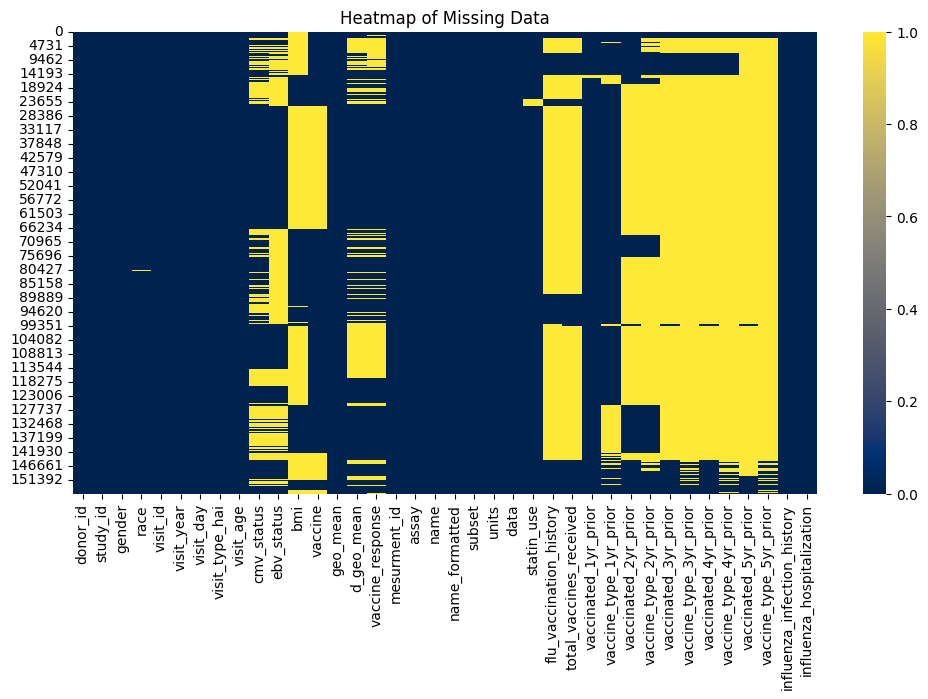

In [9]:
# Visualise missing data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(fluprint_raw.isnull(), cbar=True, cmap = "cividis")
plt.title("Heatmap of Missing Data")
plt.show()

## Challenge 1: Choosing the Right Color Scheme

One challenge in creating this visualisation was selecting an appropriate colour scheme (`cmap`). After experimenting with various options, including binary, sequential, and divergent schemes, the **'cividis'** colormap was chosen. This colormap displays missing data in yellow, providing a clear and intuitive visualisation.

---

### Number of Participants

To understand the scale and diversity of our dataset, we calculate the number of unique participants across all studies.

In [23]:
# Count unique participants in the dataset

participants_number = fluprint_raw["donor_id"].nunique()
print(participants_number)

740


### Age and Race Analysis

We examine the distribution of participants' race and their age statistics grouped by race. This analysis helps us understand the demographic composition of our dataset and identify potential age-related patterns (especially looking for bias) across different racial groups.

In [24]:
# Display race column and age statistics by race
print(fluprint_raw["race"])
display(fluprint_raw.groupby('race')['visit_age'].describe())

0         Caucasian
1         Caucasian
2         Caucasian
3         Caucasian
4         Caucasian
            ...    
156113        Asian
156114        Asian
156115        Asian
156116        Asian
156117        Asian
Name: race, Length: 156118, dtype: object


,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
American Indian or Alaska Native,241.0,41.744896,25.180894,22.00,22.00,22.00,54.52,84.00
Asian,12758.0,24.443057,9.271954,4.41,21.00,23.96,27.44,90.00
Black or African American,886.0,32.703962,12.859362,13.00,21.28,34.63,47.57,48.57
Caucasian,62651.0,29.546729,21.759945,0.58,15.91,23.00,29.00,90.00
Hispanic/Latino,5225.0,6.646258,7.104162,3.22,3.22,3.22,3.22,24.27
Other,73775.0,11.970382,9.729843,1.12,3.97,7.28,18.62,83.49


#### Key Observations:

1. **Race Distribution**:
   - The dataset is predominantly composed of Caucasian, Other, and Asian participants.
   - There are fewer representations of Black or African American, Hispanic/Latino, and American Indian or Alaska Native participants.

2. **Age Ranges**:
   - The overall age range is wide, from very young children (min 0.58 years) to elderly individuals (max 90 years).
   - Median ages vary considerably across racial groups.

3. **Age Patterns by Race**:
   - Hispanic/Latino group has the lowest mean age (6.65 years) with a narrow range.
   - American Indian or Alaska Native group has the highest mean age (41.74 years).
   - Caucasian group shows the widest age range and standard deviation.

#### Implications for Analysis:
**Representativeness**: The uneven distribution of races may impact the generalisability of findings.

---

### Distribution of Race by Visit Year

We analyse how participants' races are distributed across different visit years. This temporal analysis helps us understand any shifts in demographic composition over time and identify potential cohort effects.

In [28]:
display(fluprint_raw.groupby(['race', 'visit_age']).size())

race                              visit_age
American Indian or Alaska Native  22.00        140
                                  54.52         51
                                  84.00         50
Asian                             4.41          64
                                  5.66          64
                                              ... 
Other                             44.14        104
                                  45.12         63
                                  49.61        140
                                  59.78        102
                                  83.49         51
Length: 511, dtype: int64

Text(0, 0.5, 'Number of Participants')

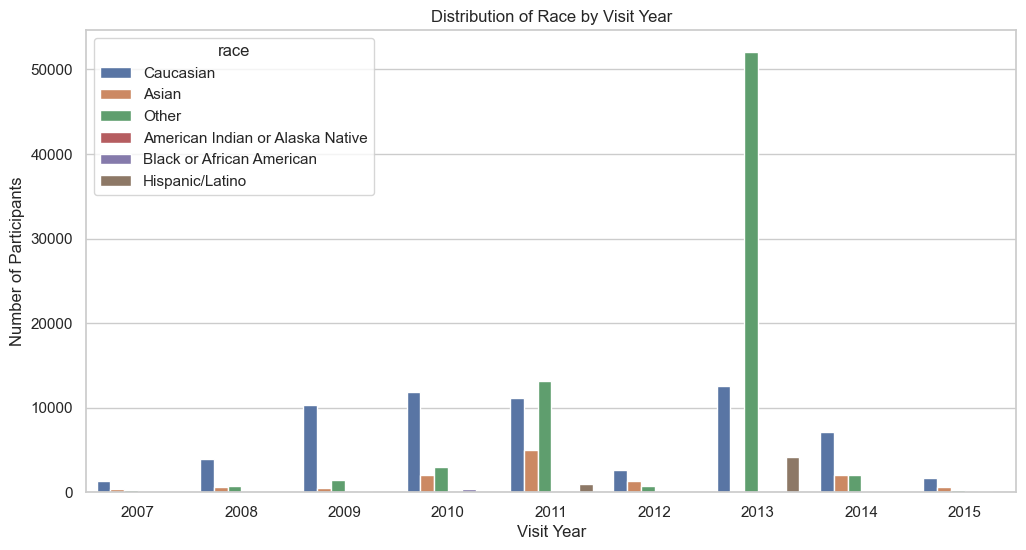

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="visit_year", hue="race", data=fluprint_raw)

plt.title("Distribution of Race by Visit Year")
plt.xlabel("Visit Year")
plt.ylabel("Number of Participants")

### Unique Donors by Race and Visit Year

We calculate the number of unique donors grouped by race and visit year, then visualise this distribution using a bar plot. Since each donor (donor_id) contains multiple rows each (due to multiple measurements of titres/metabolites and chemical signals being present), this has led to an overestimation of `the number of Participants`. In this case however the graph actually shows the number of rows which belong to a specific demographic. To see how many participants truly exists we need to use `nunique` function. This will only count the first instance of "race" for each donor_id.

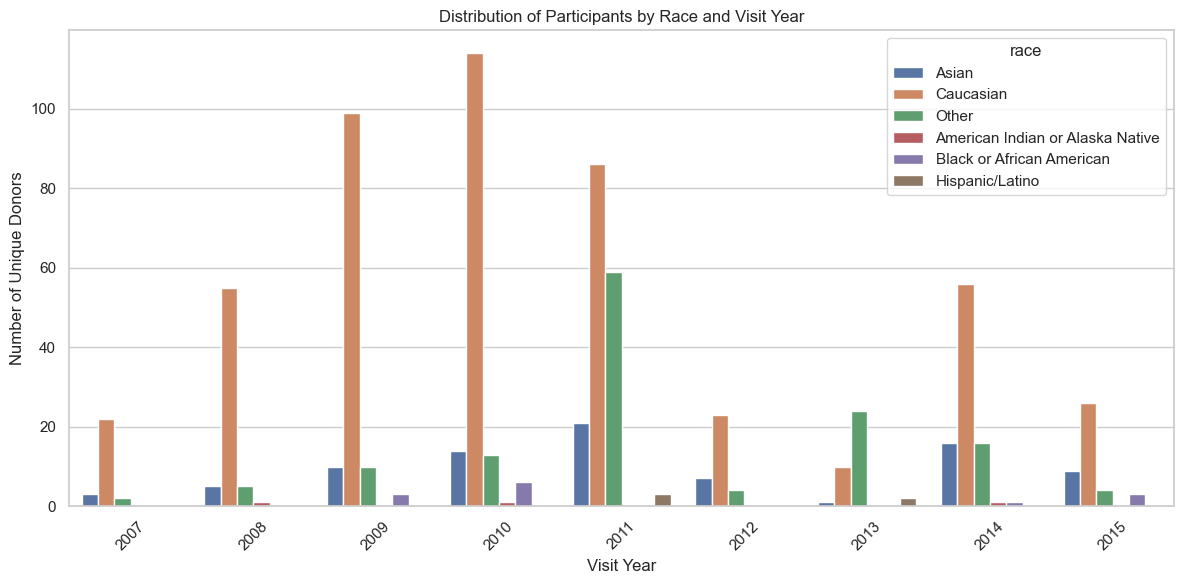

In [14]:
unique_donors = fluprint_raw.groupby(['visit_year', 'race'])['donor_id'].nunique().reset_index(name='unique_donors')

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='visit_year', y='unique_donors', hue='race', data=unique_donors)

# Add titles and labels
plt.title("Distribution of Participants by Race and Visit Year")
plt.xlabel("Visit Year")
plt.ylabel("Number of Unique Donors")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Step 4 - Feature Selection and Dataset Filtering

In this step, we remove unnecessary columns from the dataset. These columns include:
- `cmv_status` (Cytomegalovirus status)
- `ebv_status` (Epstein-Barr Virus status)
- `bmi` (Body Mass Index)
- `statin_use` (Statin use)
- `mesurment_id`, `visit_id`, and `visit_day` (administrative columns)

These columns were removed because they are not relevant for predicting vaccine response or do not provide meaningful information for our analysis.

Additionally, we remove unnecessary columns and rows with missing values in key features. This preparation is crucial for the subsequent machine learning steps.

We focus on the following key features:
- gender
- race
- visit_age
- d_geo_mean
- name
- name_formatted
- subset
- units
- data
- vaccine_response

Rows with missing values in these columns will be removed to ensure data quality for our analysis.


In [38]:
# Define the path for the filtered dataset
path = r"C:\Users\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data"
os.makedirs(path, exist_ok=True)

# Define columns to keep
columns_to_keep = ["donor_id", "gender", "race", "visit_age", "vaccine", "d_geo_mean", "name", "name_formatted", "subset", "units", "data", "vaccine_response"]

# Filter the dataset
fluprint_filtered = fluprint_raw[columns_to_keep].dropna()

# Save the filtered dataset
filepath = os.path.join(path, "Fluprint_cleaned.csv")
fluprint_filtered.to_csv(filepath, index=False)

print(f"Cleaned dataset saved to {filepath}")
print(f"Original shape: {fluprint_raw.shape}, Cleaned shape: {fluprint_filtered.shape}")

Cleaned dataset saved to C:\Users\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\Fluprint_cleaned.csv
Original shape: (156118, 38), Cleaned shape: (62621, 12)


## Confirmation of Cleaned Dataset

Before proceeding with the analysis, we visually confirm that the cleaned dataset (`fluprint_filtered`) contains no missing values. This step ensures that our data preprocessing was successful and provides a solid foundation for subsequent statistical analysis and modeling.


<Figure size 1200x600 with 0 Axes>

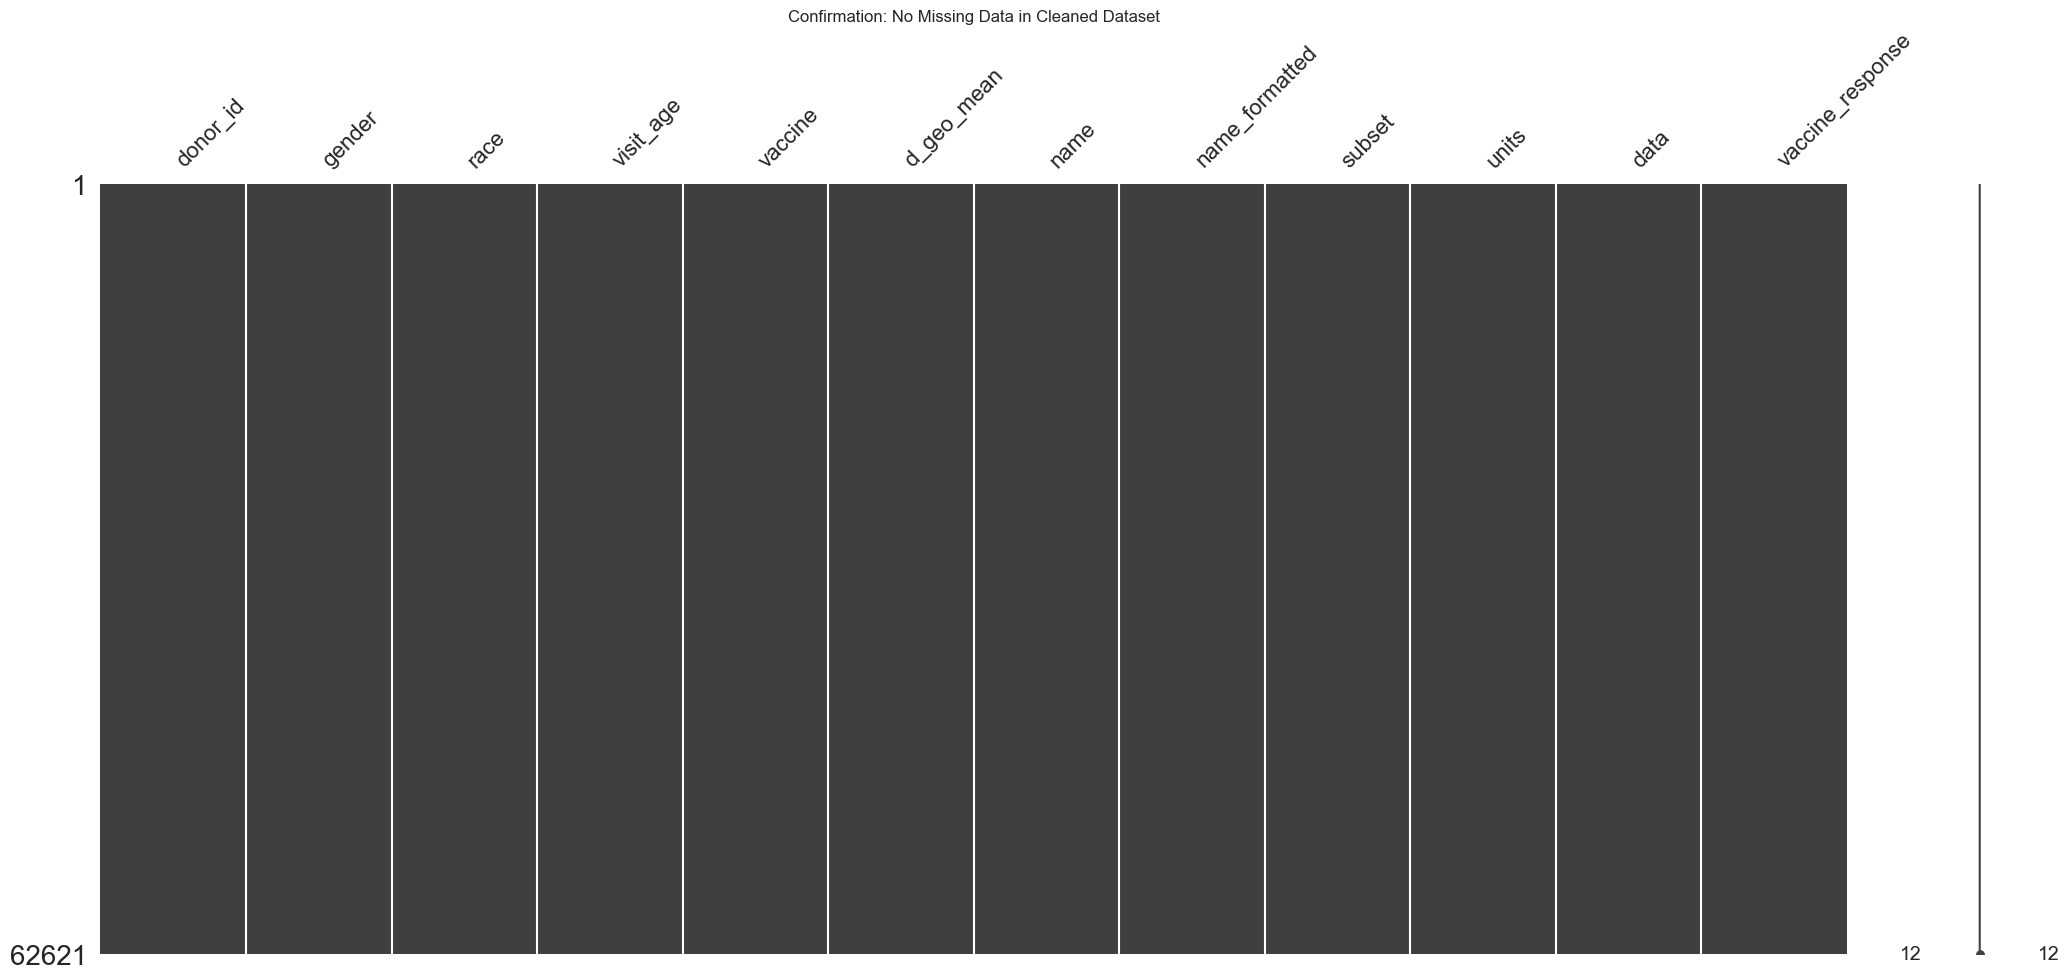

Summary of missing values:
donor_id            0
gender              0
race                0
visit_age           0
vaccine             0
d_geo_mean          0
name                0
name_formatted      0
subset              0
units               0
data                0
vaccine_response    0
dtype: int64


In [39]:
# Load the cleaned dataset
path = r"C:\Users\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\Fluprint_cleaned.csv"
fluprint_filtered = pd.read_csv(path)

# Visualize missing data in the cleaned dataset
plt.figure(figsize=(12, 6))
msno.matrix(fluprint_filtered)
plt.title("Confirmation: No Missing Data in Cleaned Dataset")
plt.show()

# Print summary of missing values
print("Summary of missing values:")
print(fluprint_filtered.isnull().sum())

# Visualising missing data

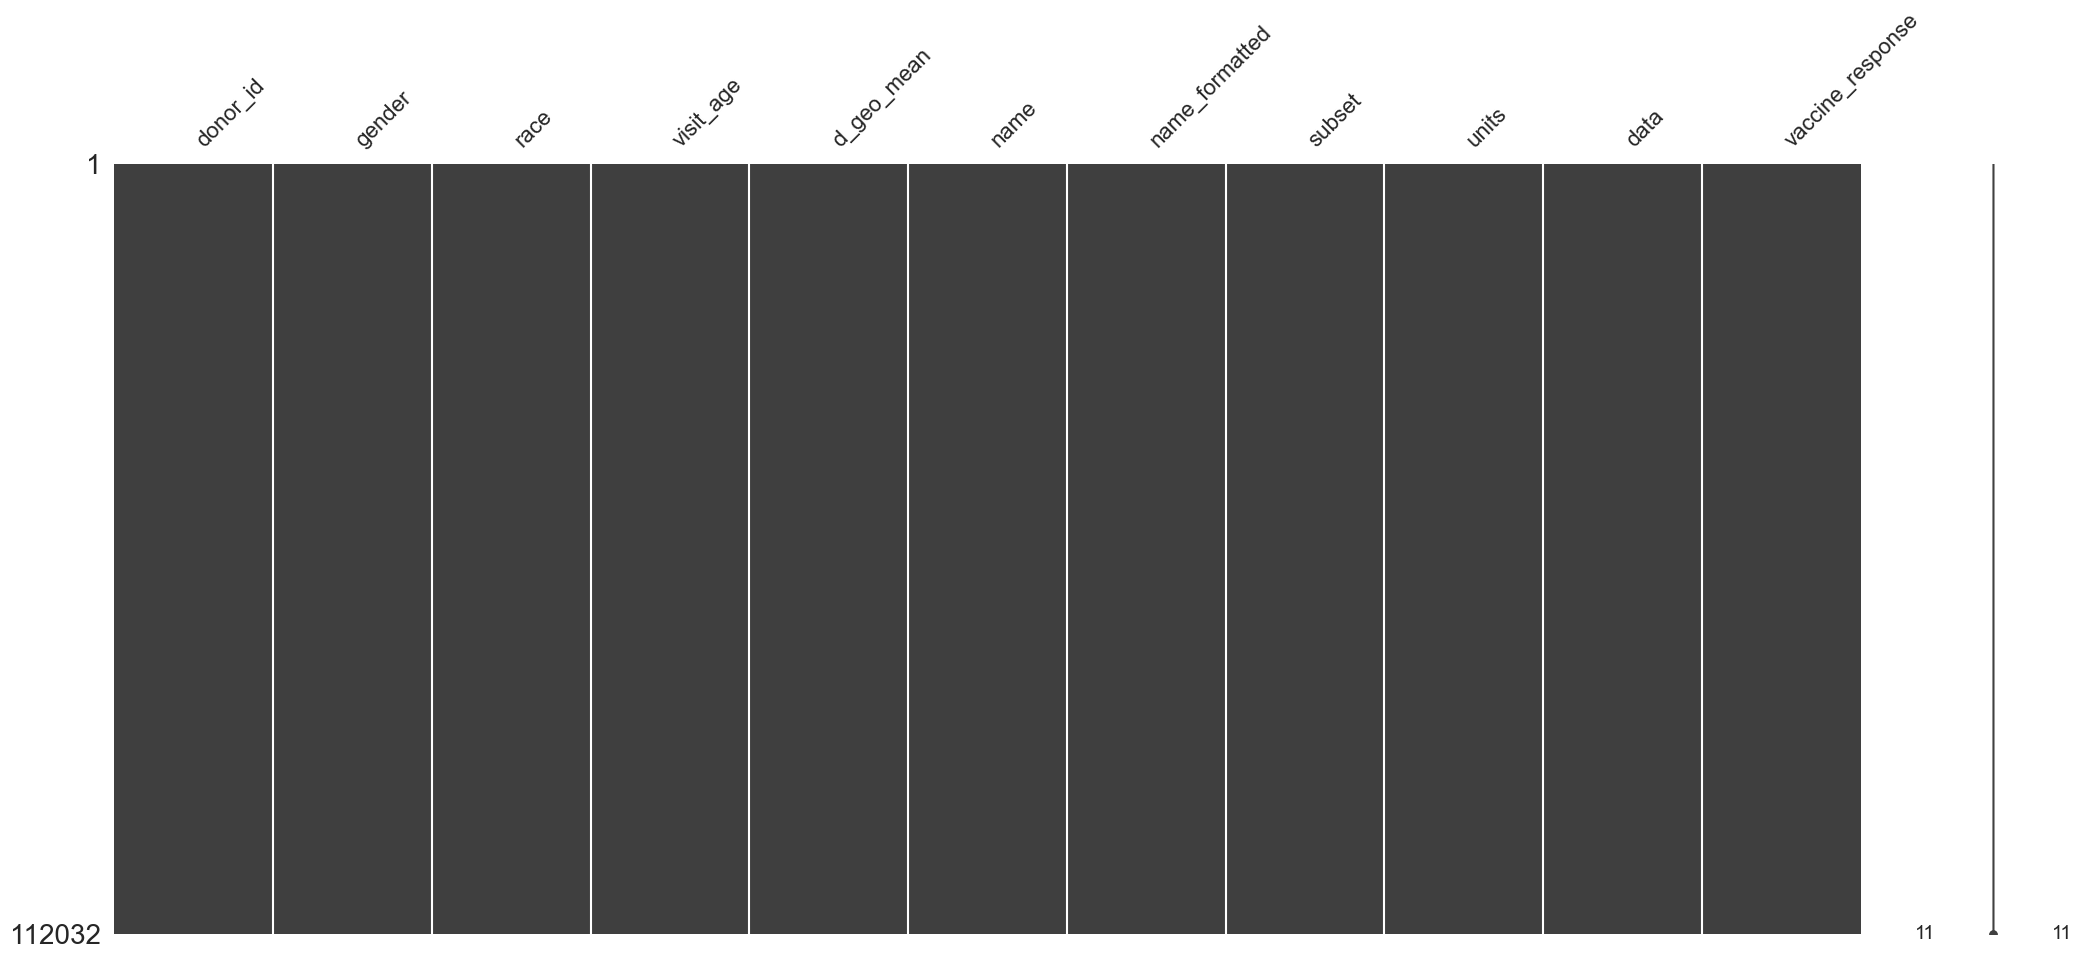

C:\Users\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


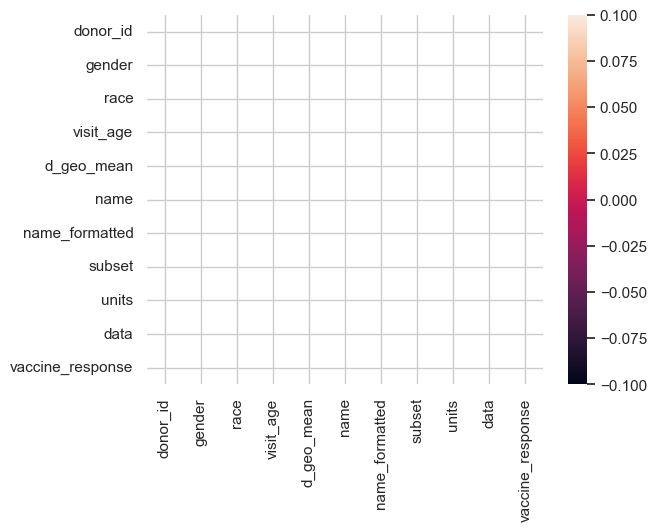

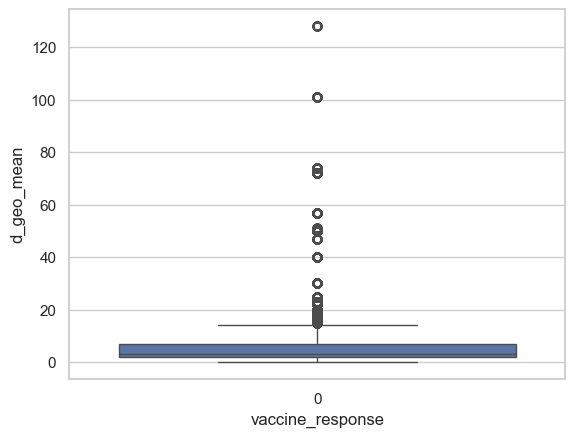

In [34]:
# Visualise missing data
msno.matrix(fluprint_filtered)
plt.show()

# Create binary indicators for missingness
missing_indicators = fluprint_filtered.isnull().astype(int)

# Correlation of missingness
correlation_matrix = missing_indicators.corr()
sns.heatmap(correlation_matrix)
plt.show()

# Compare distributions for a specific variable
sns.boxplot(x=missing_indicators['vaccine_response'], y=fluprint_filtered['d_geo_mean'])
plt.show()

## Key Variables for Vaccine Response Analysis

Our analysis focuses on two key variables related to vaccine response:

1. **delta_geo_mean**: This continuous variable represents the difference in geometric mean titers before and after vaccination. It provides a quantitative measure of the change in antibody levels, indicating the strength of the immune response to the vaccine.

2. **vaccine_resp**: This categorical variable classifies individuals as high or low responders, offering a simplified, binary assessment of the vaccine response.

### Significance of These Variables

- **delta_geo_mean** allows us to examine the magnitude of immune response and potentially explore dose-response relationships. It provides a more granular view of the vaccine's effect.

- **vaccine_response** offers a simplified, binary classification which can be useful for categorical analysis or when a clear threshold for "high" vs "low" response is clinically relevant.

In our subsequent analysis, we will use both variables to gain comprehensive insights into vaccine efficacy and individual responses.


---

## Step 5 - Data Aggregation

The following cell aggregates the data by donor_id. This preprocessing step is necessary to:
1. Remove duplicate entries for each donor
2. Summarise multiple visits into a single record per donor
3. Prepare the data for our later analysis of vaccine responses across different demographic groups

Note: This aggregated dataset will be used in the "Vaccine Response Analysis" section later in this notebook.


In [35]:
# This is the probable initial code that didn't work as intended
grouped_data = fluprint_filtered.groupby("donor_id")

# Attempt to display or use the grouped data
display(grouped_data)

### Challange 2 - Why GroupBy Alone Did Not Work as Intended
No Reduction of Data: The grouped object retains all the rows in their original form, which means that if there are multiple entries for the same donor_id, they will all still be present in the resulting DataFrame. This is why your unique count of participants was lower than expected when using only groupby().

Need for Aggregation: To summarize or collapse the data into unique entries (like counting unique participants), you need to apply an aggregation function that specifies how to handle the multiple entries per group.

In [41]:
aggregated_data = fluprint_filtered.groupby("donor_id").agg({
    "gender": "first",    # Get the first gender associated with the donor
    "race": "first",      # Get the first race associated with the donor
    "visit_age": "mean",  # Average visit age
    "vaccine": "first",    # Get the first vaccine associated with the donor
    "d_geo_mean": "first",   # Average d_geo_mean
    "vaccine_response": "first",  # Average vaccine response
}).reset_index()

# Display the aggregated data
display(aggregated_data)

,donor_id,gender,race,visit_age,vaccine,d_geo_mean,vaccine_response
0,49,Male,Caucasian,9.71,1.0,1.0,0.0
1,50,Female,Caucasian,12.31,1.0,1.0,0.0
2,51,Male,Other,9.86,1.0,1.0,0.0
3,53,Female,Asian,9.01,4.0,2.0,0.0
4,54,Male,Asian,10.47,4.0,2.0,0.0
...,...,...,...,...,...,...,...
287,809,Female,Asian,27.00,4.0,2.0,0.0
288,810,Male,Caucasian,27.00,4.0,3.0,0.0
289,811,Male,Caucasian,23.00,4.0,1.0,0.0
290,812,Male,Caucasian,28.00,4.0,1.0,0.0


In [42]:
# Calculate and print the number of unique participants across all studies
participants_numbers = aggregated_data["donor_id"].nunique()
print(f"Number of participants across the studies: {participants_numbers}")

Number of participants across the studies: 292


### Handling Missing Vaccine Information

In certain cases, the vaccine used might not be known - such seems to be the case for some donor_ids. To maintain these data points in our analysis while clearly marking unknown vaccines, we will replace NaN values in the 'vaccine' column with 0.

In [43]:
# Replace NaN values in the 'vaccine' column with 0
aggregated_data['vaccine'] = aggregated_data['vaccine'].fillna(0)

# Display the updated aggregated data
display(aggregated_data)

,donor_id,gender,race,visit_age,vaccine,d_geo_mean,vaccine_response
0,49,Male,Caucasian,9.71,1.0,1.0,0.0
1,50,Female,Caucasian,12.31,1.0,1.0,0.0
2,51,Male,Other,9.86,1.0,1.0,0.0
3,53,Female,Asian,9.01,4.0,2.0,0.0
4,54,Male,Asian,10.47,4.0,2.0,0.0
...,...,...,...,...,...,...,...
287,809,Female,Asian,27.00,4.0,2.0,0.0
288,810,Male,Caucasian,27.00,4.0,3.0,0.0
289,811,Male,Caucasian,23.00,4.0,1.0,0.0
290,812,Male,Caucasian,28.00,4.0,1.0,0.0


## Step 6 - Data Enrichment and Final Preprocessing

### Mapping Vaccine Types

Now we'll enrich our dataset by mapping the numeric vaccine codes to their corresponding names. This step adds interpretability to our data for subsequent analysis.

There are 7 types of vaccines listed below. This information was taken from the original paper. In this case, 0 represents all values for which the vaccine type is not known.


In [45]:
# Create a complete mapping dictionary for vaccine type IDs to names
vaccine_mapping = {
    0: "Unknown",
    1: "Flumist",
    2: "Fluzone Intradermal",
    3: "Fluarix",
    4: "Fluzone",
    5: "Paediatric Fluzone",
    6: "High Dose Fluzone"
}

# Apply the mapping to replace numeric codes with vaccine names
aggregated_data["vaccine"] = aggregated_data["vaccine"].replace(vaccine_mapping)

# Remove rows with missing vaccine response data
aggregated_data = aggregated_data.dropna(subset=["vaccine_response"])

# Display the updated aggregated data
display(aggregated_data)

# Define the path for saving the processed data
path = r"C:\Users\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data"
filepath = os.path.join(path, "aggregated_participants.csv")

# Save the processed data to a CSV file
aggregated_data.to_csv(filepath, index=False)

,donor_id,gender,race,visit_age,vaccine,d_geo_mean,vaccine_response
0,49,Male,Caucasian,9.71,Flumist,1.0,0.0
1,50,Female,Caucasian,12.31,Flumist,1.0,0.0
2,51,Male,Other,9.86,Flumist,1.0,0.0
3,53,Female,Asian,9.01,Fluzone,2.0,0.0
4,54,Male,Asian,10.47,Fluzone,2.0,0.0
...,...,...,...,...,...,...,...
287,809,Female,Asian,27.00,Fluzone,2.0,0.0
288,810,Male,Caucasian,27.00,Fluzone,3.0,0.0
289,811,Male,Caucasian,23.00,Fluzone,1.0,0.0
290,812,Male,Caucasian,28.00,Fluzone,1.0,0.0


Note: 
1. We've mapped the numeric vaccine codes to their corresponding names for better interpretability.
2. Rows with missing vaccine response data have been removed to ensure data quality for our analysis.
3. The processed dataset has been saved as a CSV file for future use or sharing.

This completes our preprocessing steps. The data is now ready for in-depth analysis.